In [2]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [3]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [4]:
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
kwargs = {'snmin':0,'snmax':10}

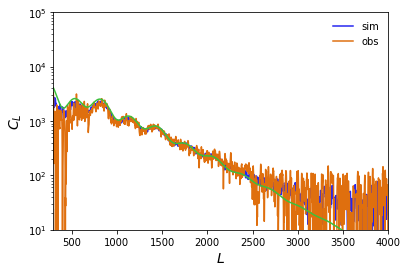

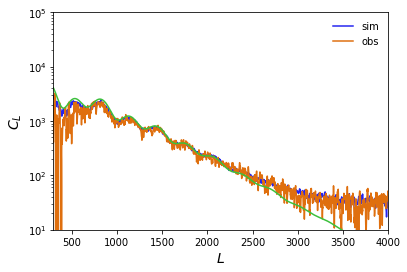

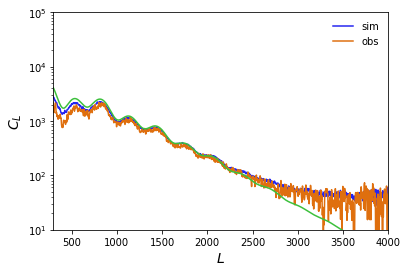

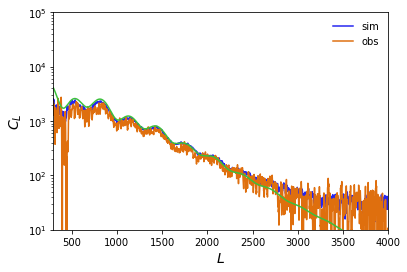

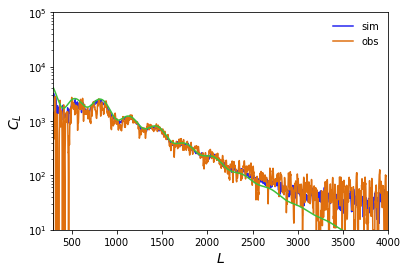

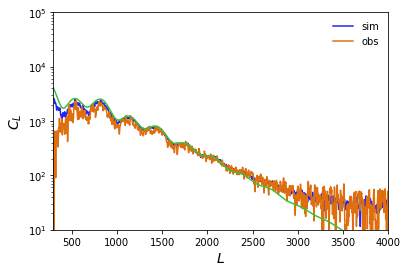

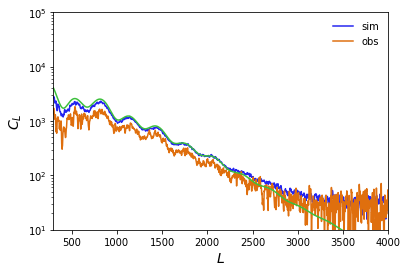

In [7]:
aobj = {}
for q in qids:
    if '_0' in q: continue
    aobj[q] = local.init_analysis_params(qid=q,**kwargs)
    l, cl_x, vl = np.loadtxt(aobj[q].fscl_x,unpack=True,usecols=(0,1,7))
    l, ol_x = np.loadtxt(aobj[q].fcls_x[0],unpack=True,usecols=(0,1))
    pl.plot_1dstyle(xmin=300,xmax=4000,ymin=1e1,ymax=1e5,ylog=True)
    plot(l,l**2*cl_x/2/np.pi,label='sim')
    plot(l,l**2*ol_x/2/np.pi,label='obs')
    plot(l,l**2*aobj[q].lcl[0,:]/2/np.pi*local.Tcmb**2)
    axhline(0,color='k')
    legend()
    show()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


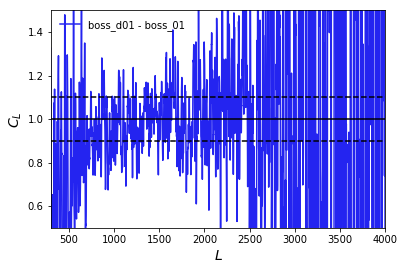

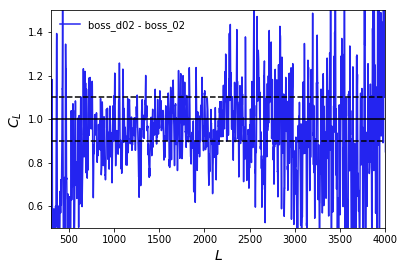

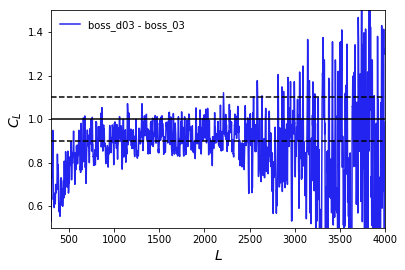

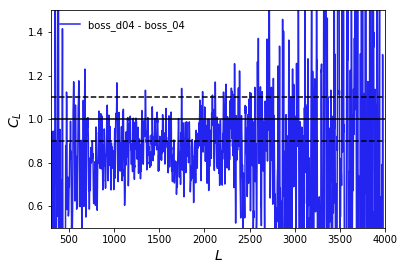

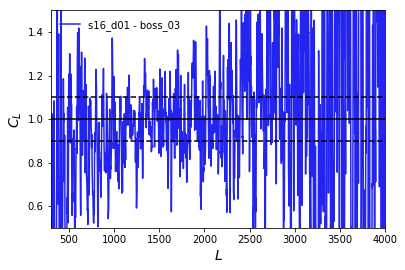

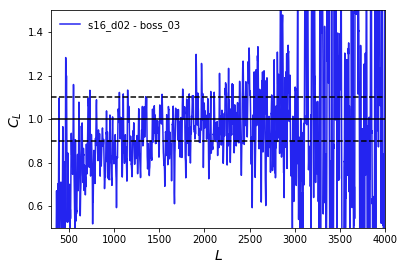

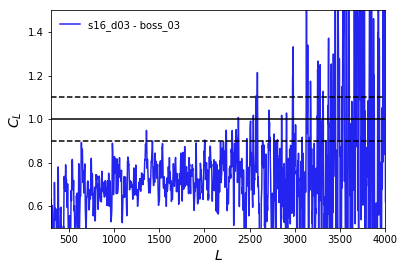

In [9]:
for q in qids:
    if '_0' in q: continue
    pid = q.replace('_d0','_0')
    if 's16' in q:
        pid = 'boss_03'
    l, cl_x, vl = np.loadtxt(aobj[q].fscl_x,unpack=True,usecols=(0,1,7))
    l, ol_x = np.loadtxt(aobj[q].fcls_x[0],unpack=True,usecols=(0,1))
    pl.plot_1dstyle(xmin=300,xmax=4000,ymin=.5,ymax=1.5)
    plot(l,ol_x/cl_x,label=q+' - '+pid)
    axhline(1.,color='k',ls='-')
    axhline(.9,color='k',ls='--')
    axhline(1.1,color='k',ls='--')
    legend()
    show()